In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
df.shape

(768, 9)

In [ ]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# check if any null value is present
df.isnull().values.any()

False

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

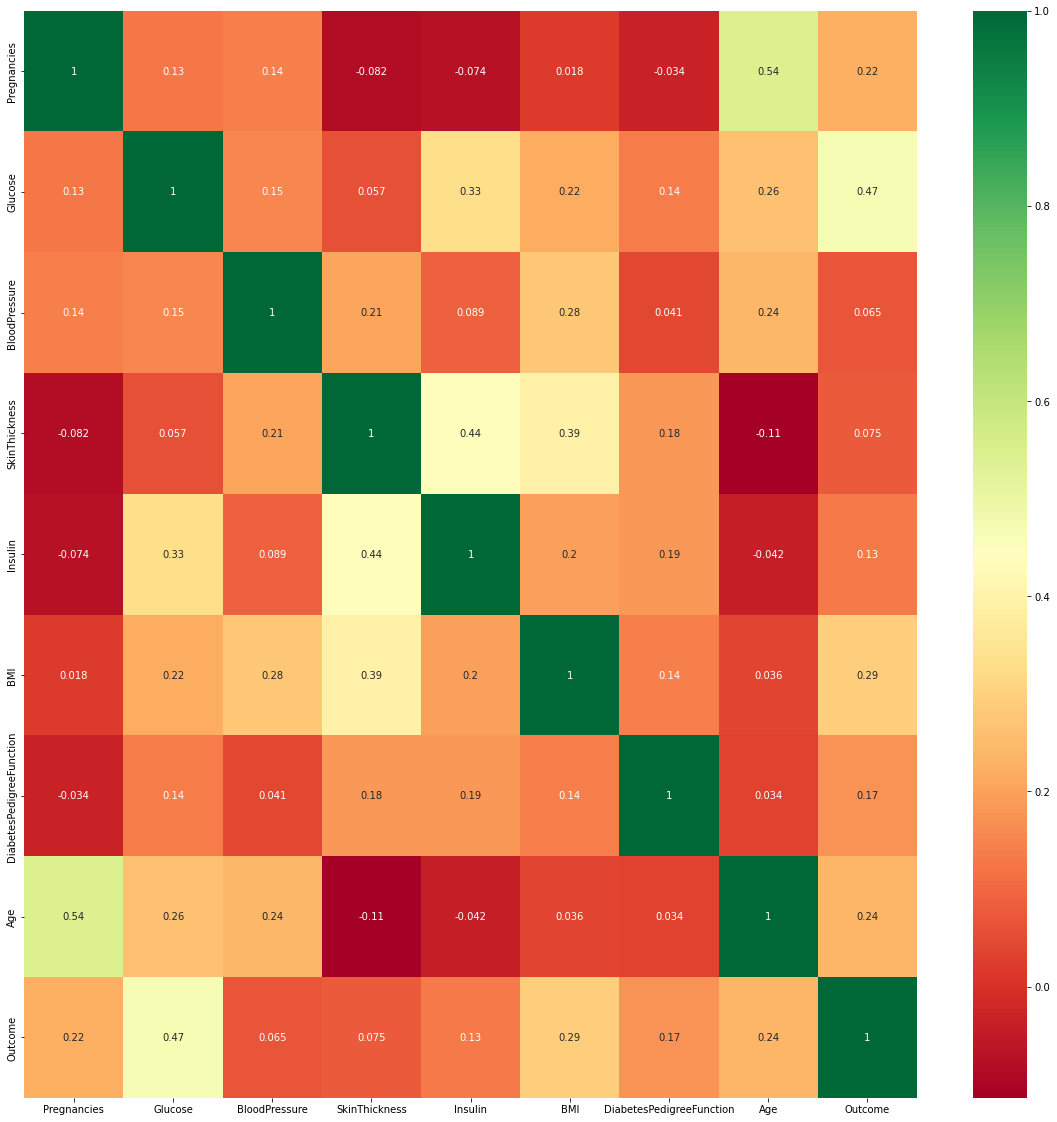

In [ ]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# Display the correlation table
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

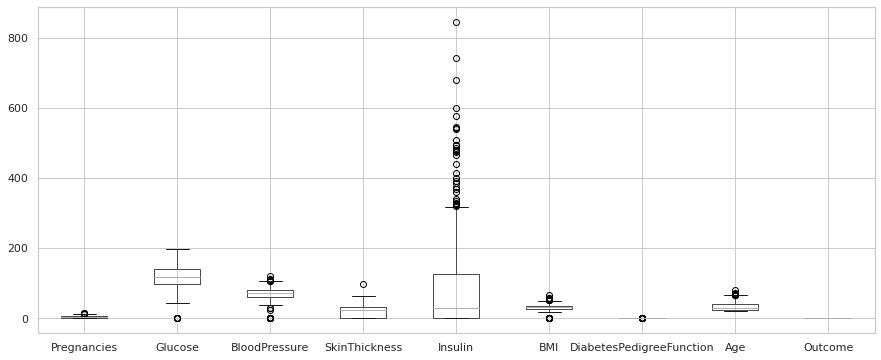

In [ ]:
#box plot for outlier visualization
sns.set(style="whitegrid")
df.boxplot(figsize=(15,6))

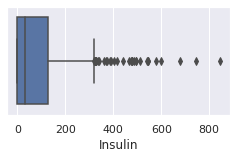

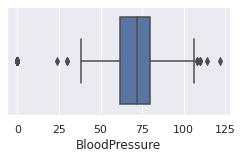

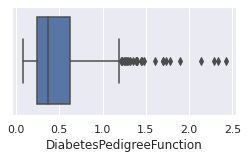

In [ ]:
#box plot
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df['Insulin'])
plt.show()
sns.boxplot(x=df['BloodPressure'])
plt.show()
sns.boxplot(x=df['DiabetesPedigreeFunction'])
plt.show()

In [ ]:
#outlier remove

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

---Q1--- 
 Pregnancies                  1.00000
Glucose                     99.00000
BloodPressure               62.00000
SkinThickness                0.00000
Insulin                      0.00000
BMI                         27.30000
DiabetesPedigreeFunction     0.24375
Age                         24.00000
Outcome                      0.00000
Name: 0.25, dtype: float64

---Q3--- 
 Pregnancies                   6.00000
Glucose                     140.25000
BloodPressure                80.00000
SkinThickness                32.00000
Insulin                     127.25000
BMI                          36.60000
DiabetesPedigreeFunction      0.62625
Age                          41.00000
Outcome                       1.00000
Name: 0.75, dtype: float64

---IQR---
 Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigr

In [ ]:
#outlier remove
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape
#more than 80 records deleted

((768, 9), (639, 9))

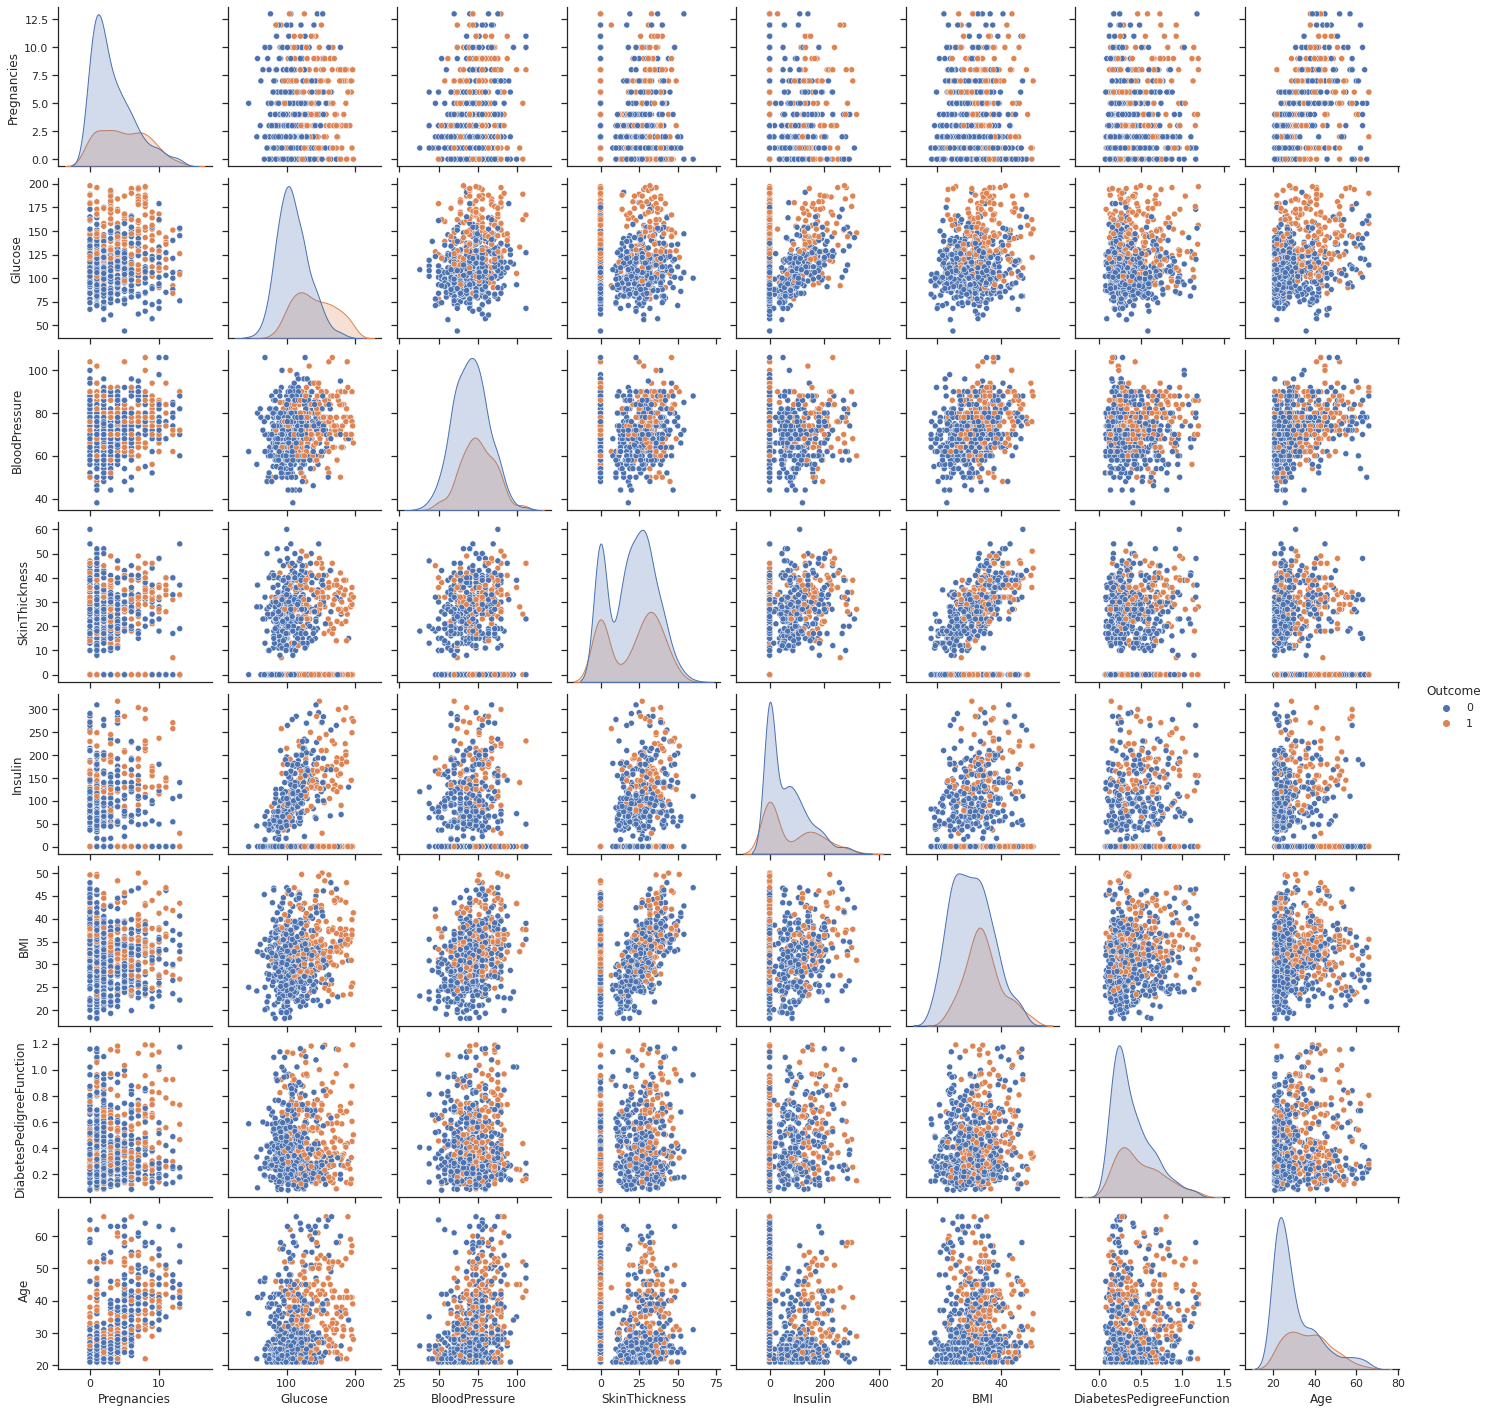

In [ ]:
#Scatter matrix after removing outlier
sns.set(style="ticks")
sns.pairplot(df_out, hue="Outcome")
plt.show()

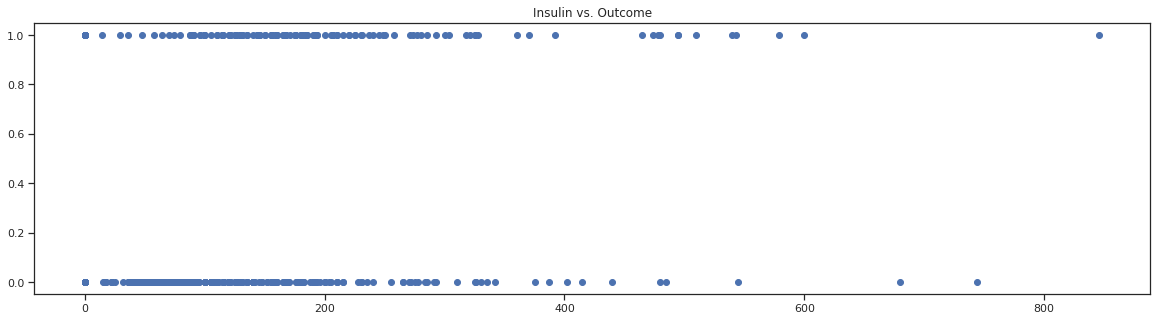

In [ ]:
plt.figure(figsize=(20,5))

plt.scatter(df['Insulin'],df['Outcome'])
plt.title('Insulin vs. Outcome')
plt.show()

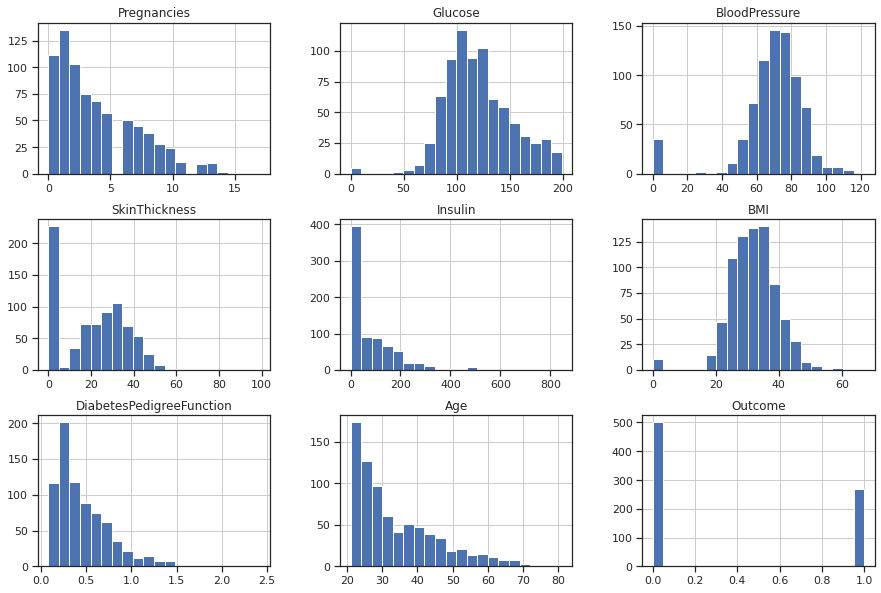

In [ ]:
# Plot the distribution of each variable
df.hist(bins=20, figsize=(15,10))
plt.show()

In [ ]:
#Check how many other missing(zero) values
print("total number of rows : {0}".format(len(df)))
print("number of rows missing glucose_conc: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("number of rows missing glucose_conc: {0}".format(len(df.loc[df['Glucose'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(df.loc[df['BloodPressure'] == 0])))
print("number of rows missing insulin: {0}".format(len(df.loc[df['Insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(df.loc[df['BMI'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(df.loc[df['Outcome'] == 0])))
print("number of rows missing age: {0}".format(len(df.loc[df['Age'] == 0])))
print("number of rows missing skin: {0}".format(len(df.loc[df['SkinThickness'] == 0])))

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 500
number of rows missing age: 0
number of rows missing skin: 227


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np
fill_values = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train = fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [ ]:
# Normalize data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Reshape data for LSTM model
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

LSTM Model

In [ ]:
# LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, 8), activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
def create_model(units=50, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV

In [ ]:
## Hyper Parameter Optimization
param_grid = {'units': [16, 32, 50],
              'epochs': [50, 100],
              'batch_size': [32, 64, 72],
              'verbose': [0, 1, 2]}


In [ ]:
from keras.wrappers.scikit_learn import KerasRegressor
model_wrapper = KerasRegressor(build_fn=create_model)

<ipython-input-29-ae110669e231>:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_wrapper = KerasRegressor(build_fn=create_model)


In [ ]:
def custom_scorer(estimator, X, y):
    return estimator.score(X, y)

In [ ]:
grid = GridSearchCV(estimator=model_wrapper, param_grid=param_grid, n_jobs=-1, cv=5, scoring=custom_scorer)
grid_result = grid.fit(X_train, y_train) 

/usr/local/lib/python3.9/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/100
10/10 [==============================] - 5s 5ms/step - loss: 0.3618
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3304
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3019
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2781
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2564
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2380
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2223
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 0.2087
Epoch 9/100
10/10 [==============================] - 0s 8ms/step - loss: 0.1976
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1884
Epoch 11/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1809
Epoch 12/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1750
Epoch 13/100
10/10 [=================

In [ ]:
# Print the best hyperparameters and corresponding model performance
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.158873 using {'batch_size': 64, 'epochs': 100, 'units': 16, 'verbose': 1}


In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
# Compile model
# setting a different learning rate for the optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train model
# increasing the number of epochs to 200
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)


Epoch 1/50
10/10 [==============================] - 4s 6ms/step - loss: 0.3065 - accuracy: 0.8550
Epoch 2/50
10/10 [==============================] - 0s 5ms/step - loss: 0.2929 - accuracy: 0.8599
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 0.2785 - accuracy: 0.8795
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 0.2905 - accuracy: 0.8746
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 0.2878 - accuracy: 0.8550
Epoch 6/50
10/10 [==============================] - 0s 5ms/step - loss: 0.2882 - accuracy: 0.8681
Epoch 7/50
10/10 [==============================] - 0s 7ms/step - loss: 0.2736 - accuracy: 0.8713
Epoch 8/50
10/10 [==============================] - 0s 5ms/step - loss: 0.2969 - accuracy: 0.8697
Epoch 9/50
10/10 [==============================] - 0s 5ms/step - loss: 0.2829 - accuracy: 0.8876
Epoch 10/50
10/10 [==============================] - 0s 5ms/step - loss: 0.2842 - accuracy: 0.8648
Epoch 11/50
10/10 [

In [ ]:
ypred = model.predict(X_test)
ypred

5/5 [==============================] - 0s 3ms/step


array([[9.99983490e-01],
       [5.76869100e-02],
       [4.45561484e-02],
       [5.23975551e-01],
       [1.08803157e-02],
       [5.17486478e-04],
       [9.92883980e-01],
       [8.80301476e-01],
       [6.15618825e-01],
       [5.05043864e-02],
       [9.35549200e-01],
       [9.73096132e-01],
       [2.24141963e-02],
       [2.86465846e-02],
       [2.59243876e-01],
       [6.13604859e-02],
       [9.79504108e-01],
       [3.18965249e-05],
       [1.57641098e-01],
       [3.32407355e-01],
       [7.71161973e-01],
       [2.98065152e-02],
       [6.73741288e-03],
       [1.18193574e-01],
       [1.32395426e-05],
       [7.07698047e-01],
       [1.60421099e-04],
       [1.00000000e+00],
       [1.26667088e-02],
       [1.79808408e-01],
       [2.28993028e-01],
       [1.28199801e-01],
       [7.90532026e-03],
       [8.01335037e-01],
       [3.60737904e-04],
       [6.68911517e-01],
       [2.45022714e-01],
       [2.83187535e-03],
       [9.30569887e-01],
       [9.44031239e-01],


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
from numpy import sqrt 
rmse2 = sqrt(mean_squared_error(y_test, ypred))
print(rmse2)

0.4178791707724321


In [ ]:
print(ypred.shape)
print(y_test.shape)

(154, 1)
(154,)


In [ ]:
n = int(0.2*(len(df))+1)
n

154

In [ ]:
ypred = ypred.reshape(n,)
ypred

array([9.99983490e-01, 5.76869100e-02, 4.45561484e-02, 5.23975551e-01,
       1.08803157e-02, 5.17486478e-04, 9.92883980e-01, 8.80301476e-01,
       6.15618825e-01, 5.05043864e-02, 9.35549200e-01, 9.73096132e-01,
       2.24141963e-02, 2.86465846e-02, 2.59243876e-01, 6.13604859e-02,
       9.79504108e-01, 3.18965249e-05, 1.57641098e-01, 3.32407355e-01,
       7.71161973e-01, 2.98065152e-02, 6.73741288e-03, 1.18193574e-01,
       1.32395426e-05, 7.07698047e-01, 1.60421099e-04, 1.00000000e+00,
       1.26667088e-02, 1.79808408e-01, 2.28993028e-01, 1.28199801e-01,
       7.90532026e-03, 8.01335037e-01, 3.60737904e-04, 6.68911517e-01,
       2.45022714e-01, 2.83187535e-03, 9.30569887e-01, 9.44031239e-01,
       1.79851457e-01, 1.84959956e-02, 2.17857778e-01, 9.38161254e-01,
       9.99991477e-01, 9.37992573e-10, 9.97484080e-04, 4.01119702e-02,
       4.17083949e-01, 1.76490381e-01, 6.17623031e-01, 1.01951800e-01,
       9.99127150e-01, 1.54970005e-01, 3.53910290e-02, 2.67226756e-06,
      

In [ ]:
# Evaluate model on testing set
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print('Accuracy:', accuracy*100)

5/5 - 0s - loss: 0.4760 - accuracy: 0.8052 - 73ms/epoch - 15ms/step
Accuracy: 80.51947951316833


SVM Model


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Split the data into training and testing sets
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = SVC(kernel='linear')

In [ ]:
# Define the SVM model
model = SVC()

In [ ]:
# Define the hyperparameters to search over
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [ ]:
# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

In [ ]:
# Train the model with the best hyperparameters
model = SVC(**best_params)
model.fit(X_train, y_train)

SVC(C=1)

In [ ]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion matrix:")
print(confusion)

Accuracy: 0.7337662337662337
Confusion matrix:
[[82 17]
 [24 31]]


KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean',p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
KNeighborsClassifier(metric='euclidean')

KNeighborsClassifier(metric='euclidean')

In [ ]:
y_pred=knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
knn.score(X_test,y_test)

0.6948051948051948

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
metrics.accuracy_score(y_test,y_pred)

0.6948051948051948

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
mat

array([[79, 20],
       [27, 28]])

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Diabetes', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Diabetes       0.75      0.80      0.77        99
      Normal       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



In [ ]:
#Elbow Method
#For selecting K value
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

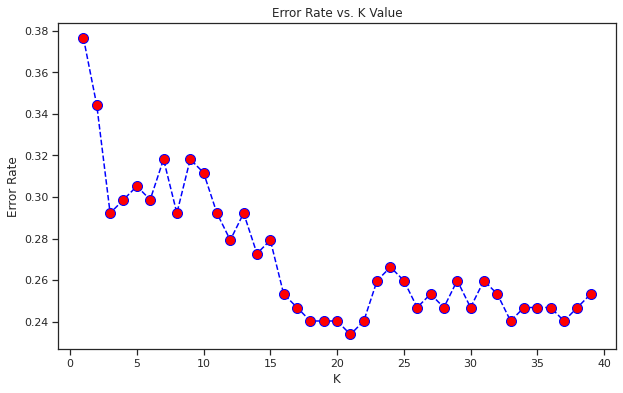

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn=KNeighborsClassifier(n_neighbors=18,metric='euclidean',p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=18)

In [ ]:
y_pred=knn.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
knn.score(X_test,y_test)

0.7597402597402597

<AxesSubplot:>

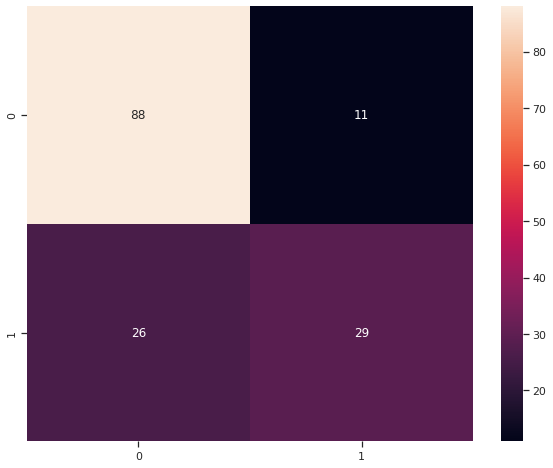

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(mat, annot=True)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Diabetes', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Diabetes       0.77      0.89      0.83        99
      Normal       0.72      0.53      0.61        55

    accuracy                           0.76       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.76      0.76      0.75       154



Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
import sklearn.metrics as mt

In [ ]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.coef_

array([[ 0.21255833,  1.07113231, -0.24784154,  0.04569683, -0.2008266 ,
         0.77815151,  0.23060673,  0.42100175]])

In [ ]:
yPredict = model.predict(X_test)
yPredict

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
y_test.head()

668    0
324    0
624    0
690    0
473    0
Name: Outcome, dtype: int64

In [ ]:
# accuracy = (TP + TN) / (TP + TN + FP + FN)
score = model.score(X_test, y_test)
score

0.7532467532467533